In [32]:
def force(epsilon_0, lambda_0, temps, epsilon_crit_0, epsilon, temps_crit_0):
    if abs(epsilon_0-epsilon)<epsilon_crit_0:
        denom = (epsilon_crit_0)**(-3) * (epsilon-epsilon_0)
    else:
        denom = (epsilon-epsilon_0)**(-3) * abs(epsilon-epsilon_0)
    
    return lambda_0*denom*((temps**2)/(temps**2 + temps_crit_0**2))

m = 1
c = 10

d0 = 0.0
d = [d0]

v0 = 0.0
v = [v0]

a = []

l0 = 1.
e0 = 0.
ec0 = 0.5

l1 = 1000.
tc1 = 70.
e1 = 10.
ec1 = 3

TMAX = 100
ITER = 100000

dt = TMAX/ITER

for i in range(1,ITER+1):
    accel = (1./m) * - force(
        epsilon_0=e0, 
        lambda_0=l0, 
        temps=i*dt,
        epsilon_crit_0=ec0, 
        epsilon=d[-1],
        temps_crit_0=0.001,
    ) - force(
        epsilon_0=e1,
        lambda_0=l1,
        temps=i*dt,
        epsilon_crit_0=ec1,
        epsilon=d[-1],
        temps_crit_0=tc1,
    ) -c * v[-1]

    vit = v[-1] + accel*dt
    dep = d[-1] + vit*dt

    a.append(accel)
    v.append(vit)
    d.append(dep)

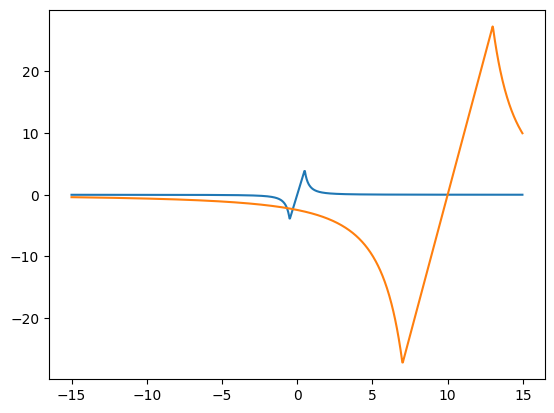

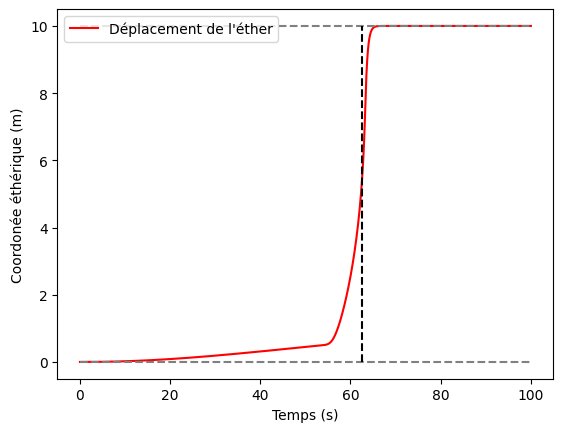

In [33]:
import matplotlib.pyplot as plt

plt.figure(1)
absi = [30/1000 * i-15 for i in range (1000)]
t = 40

# En bleu force du plan matériel, en orange force du plan 1
plt.plot(absi, [
        force(e0,l0,t,ec0,ab,0.01)
        for ab in absi
    ]
)

# abscisse éthérique en fonction du temps
plt.plot(absi, [
        force(e1,l1,t,ec1,ab,tc1)
        for ab in absi
    ]
)

plt.figure(2)
plt.plot([i*dt for i in range(ITER+1)], d, label='Déplacement de l\'éther', color='r')
plt.hlines(y=(0, 10), xmin=0, xmax=100, color='gray', linestyle='dashed')
plt.vlines(x=(tc1-7.5,), ymin=0, ymax=10, color='black', linestyle='dashed')
plt.xlabel('Temps (s)')
plt.ylabel('Coordonée éthérique (m)')
plt.legend()